In [1]:
import pandas as pd
df_tweets = pd.read_csv('/Users/jameskrice/Downloads/twitter-map_Climate_change.csv')

In [2]:
import pandas as pd
df_tweets_misinfo = pd.read_csv('/Users/jameskrice/Downloads/twitter-map_Climate_change_Misinformation.csv')

In [3]:
print(df_tweets_misinfo.head())

                                                text  \
0  DEFCON 5: “We have an imperative to build a ‘p...   
1  I am not @nytimes. I saw policemen breaking cc...   
2  The United States receives no oil from Lybia. ...   
3  I already know ⁦@NYGovCuomo⁩ is going to blame...   
4  While the AP reported on the sluggish jobs rep...   

                                        text_cleaned  retweet_count  \
0  DEFCON 5: “We have an imperative to build a ‘p...           4620   
1  I am not @nytimes. I saw policemen breaking cc...           2773   
2  The United States receives no oil from Lybia. ...           1700   
3  I already know ⁦@NYGovCuomo⁩ is going to blame...           2182   
4  While the AP reported on the sluggish jobs rep...          14684   

     local_time                                            tweetId   id_  
0  1.593780e+12  http://twitter.com/i/web/status/12790213512868...  BFVo  
1  1.584030e+12  http://twitter.com/i/web/status/12381547141910...  MF/e  
2  1.299520

In [4]:
import pandas as pd

# Assuming your DataFrame is named df
# Convert local_time from Unix time (milliseconds) to datetime
df_tweets['local_time'] = pd.to_datetime(df_tweets['local_time'], unit='ms')

# Filter the DataFrame to keep only rows from 2012 onwards
df_filtered = df_tweets[df_tweets['local_time'].dt.year >= 2012]

# Display the filtered DataFrame
print(df_filtered)


                                             text_cleaned  retweet_count  \
0       DEFCON 5: “We have an imperative to build a ‘p...           4620   
1                                     Its all happening .           1638   
3       The moon is in Aries and it is full. People ar...           3051   
4       energy flows where our intention goes.... CREA...          10464   
6       Dear Nigerians in Nigeria Save the country if ...           2112   
...                                                   ...            ...   
288466  Changing the date on ur paper to a few days ea...           1306   
288468  School starts, it's time for me to be better t...           1603   
288469  EVERYTHING IS ALREADY IMPROVING SOMEHOW MY BOO...           1401   
288470  everyone is using face tune to see what they l...          11058   
288471  Do the work. Fuck everything else. Just do the...           3500   

                                                     text          local_time  \
0     

In [5]:
import pandas as pd

# Assuming your DataFrame is named df
# Convert local_time from Unix time (milliseconds) to datetime
df_tweets_misinfo['local_time'] = pd.to_datetime(df_tweets_misinfo['local_time'], unit='ms')

# Filter the DataFrame to keep only rows from 2012 onwards
df_filtered_misinfo = df_tweets_misinfo[df_tweets_misinfo['local_time'].dt.year >= 2012]

# Display the filtered DataFrame
print(df_filtered_misinfo)

                                                     text  \
0       DEFCON 5: “We have an imperative to build a ‘p...   
1       I am not @nytimes. I saw policemen breaking cc...   
3       I already know ⁦@NYGovCuomo⁩ is going to blame...   
4       While the AP reported on the sluggish jobs rep...   
5       not ONE sentence in this piece abt how the pre...   
...                                                   ...   
373399  Unlike this moronic @NRA tweet, mine is not ma...   
373400  Ayotte’s ‘no’ vote helps defeat background che...   
373401  Nobel secretary regrets Obama peace prize - BB...   
373402  the surest sign there's an election soon -- ca...   
373403  In the last nine months of Trump’s presidency ...   

                                             text_cleaned  retweet_count  \
0       DEFCON 5: “We have an imperative to build a ‘p...           4620   
1       I am not @nytimes. I saw policemen breaking cc...           2773   
3       I already know ⁦@NYGovCuomo⁩ is

In [7]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the VADER lexicon (if not already downloaded)
nltk.download('vader_lexicon')

# Instantiate the analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to determine sentiment based on the compound score
def get_sentiment(text):
    scores = sia.polarity_scores(text)
    compound = scores['compound']
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to each dataset's text column
df_filtered['sentiment'] = df_filtered['text_cleaned'].apply(get_sentiment)
df_filtered_misinfo['sentiment'] = df_filtered_misinfo['text_cleaned'].apply(get_sentiment)

# Optional: Print out counts of each sentiment category for each dataset
print("Sentiment counts in df_tweets_2012:")
print(df_filtered['sentiment'].value_counts())

print("\nSentiment counts in df_misinformation_2012:")
print(df_filtered_misinfo['sentiment'].value_counts())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jameskrice/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/var/folders/5q/1f09s04n43vcty_yjrp9hjjh0000gn/T/ipykernel_31451/1152692721.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['sentiment'] = df_filtered['text_cleaned'].apply(get_sentiment)


Sentiment counts in df_tweets_2012:
sentiment
positive    109576
negative     79910
neutral      58378
Name: count, dtype: int64

Sentiment counts in df_misinformation_2012:
sentiment
negative    188664
positive    115340
neutral      46015
Name: count, dtype: int64


/var/folders/5q/1f09s04n43vcty_yjrp9hjjh0000gn/T/ipykernel_31451/1152692721.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_misinfo['sentiment'] = df_filtered_misinfo['text_cleaned'].apply(get_sentiment)


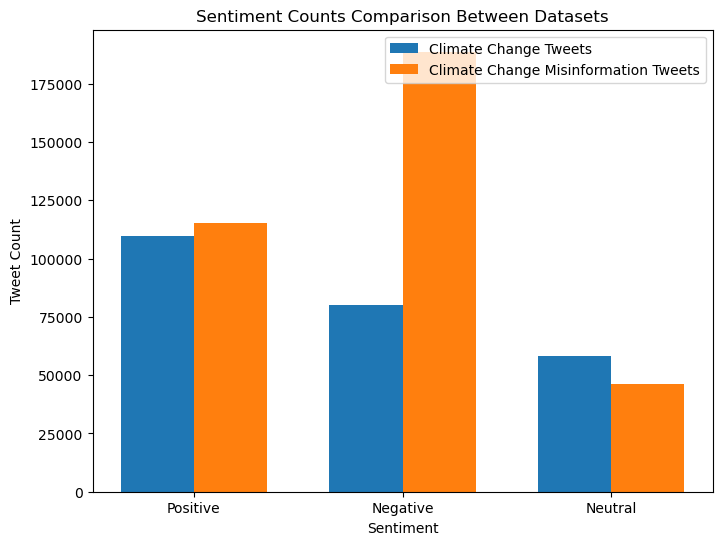

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the sentiment counts for each dataset
counts_tweets = {'Positive': 109576, 'Negative': 79910, 'Neutral': 58378}
counts_misinfo = {'Positive': 115340, 'Negative': 188664, 'Neutral': 46015}

# Create a DataFrame from the counts for easier plotting
df_counts = pd.DataFrame({
    'df_tweets_2012': counts_tweets,
    'df_misinformation_2012': counts_misinfo
})
df_counts.index.name = 'Sentiment'
df_counts = df_counts.reset_index()

# Create the grouped bar chart
x = np.arange(len(df_counts['Sentiment']))  # positions for sentiment categories
width = 0.35  # width of each bar

fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(x - width/2, df_counts['df_tweets_2012'], width, label='Climate Change Tweets')
rects2 = ax.bar(x + width/2, df_counts['df_misinformation_2012'], width, label='Climate Change Misinformation Tweets')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Sentiment')
ax.set_ylabel('Tweet Count')
ax.set_title('Sentiment Counts Comparison Between Datasets')
ax.set_xticks(x)
ax.set_xticklabels(df_counts['Sentiment'])
ax.legend()

plt.show()


/var/folders/5q/1f09s04n43vcty_yjrp9hjjh0000gn/T/ipykernel_31451/4164795333.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['local_time'] = pd.to_datetime(df_filtered['local_time'])
/var/folders/5q/1f09s04n43vcty_yjrp9hjjh0000gn/T/ipykernel_31451/4164795333.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_misinfo['local_time'] = pd.to_datetime(df_filtered_misinfo['local_time'])


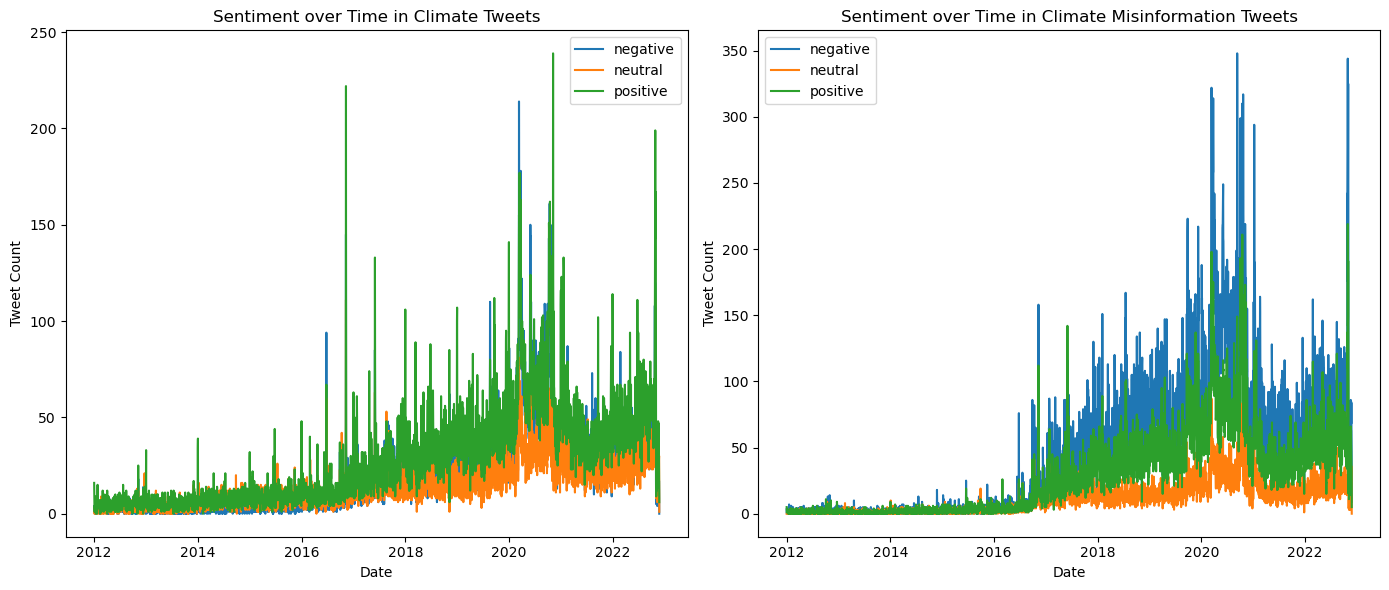

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the local_time column to datetime if not already done
df_filtered['local_time'] = pd.to_datetime(df_filtered['local_time'])
df_filtered_misinfo['local_time'] = pd.to_datetime(df_filtered_misinfo['local_time'])

# Group by day and sentiment, then count the tweets in each group
tweets_grouped = df_filtered.groupby([pd.Grouper(key='local_time', freq='D'), 'sentiment']).size().unstack(fill_value=0)
misinfo_grouped = df_filtered_misinfo.groupby([pd.Grouper(key='local_time', freq='D'), 'sentiment']).size().unstack(fill_value=0)

# Create subplots for each dataset
plt.figure(figsize=(14, 6))

# Plot for df_tweets_2012
plt.subplot(1, 2, 1)
for sentiment in tweets_grouped.columns:
    plt.plot(tweets_grouped.index, tweets_grouped[sentiment], label=sentiment)
plt.title('Sentiment over Time in Climate Tweets')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.legend()

# Plot for df_misinformation_2012
plt.subplot(1, 2, 2)
for sentiment in misinfo_grouped.columns:
    plt.plot(misinfo_grouped.index, misinfo_grouped[sentiment], label=sentiment)
plt.title('Sentiment over Time in Climate Misinformation Tweets')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.legend()

plt.tight_layout()
plt.show()


/var/folders/5q/1f09s04n43vcty_yjrp9hjjh0000gn/T/ipykernel_31451/2049667608.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['local_time'] = pd.to_datetime(df_filtered['local_time'])
/var/folders/5q/1f09s04n43vcty_yjrp9hjjh0000gn/T/ipykernel_31451/2049667608.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_misinfo['local_time'] = pd.to_datetime(df_filtered_misinfo['local_time'])


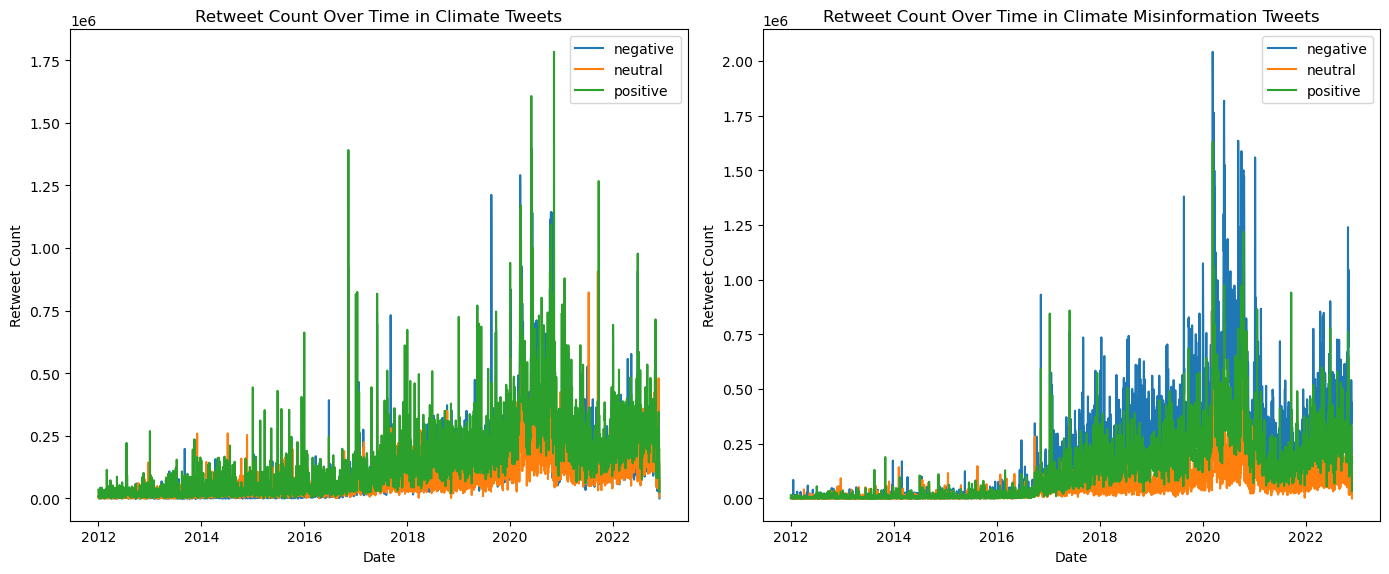

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the local_time column is datetime
df_filtered['local_time'] = pd.to_datetime(df_filtered['local_time'])
df_filtered_misinfo['local_time'] = pd.to_datetime(df_filtered_misinfo['local_time'])

# Group by day and sentiment and sum the retweet counts
tweets_retweets = df_filtered.groupby([pd.Grouper(key='local_time', freq='D'), 'sentiment'])['retweet_count'].sum().unstack(fill_value=0)
misinfo_retweets = df_filtered_misinfo.groupby([pd.Grouper(key='local_time', freq='D'), 'sentiment'])['retweet_count'].sum().unstack(fill_value=0)

# Set up the plot
plt.figure(figsize=(14, 6))

# Plot for df_tweets_2012
plt.subplot(1, 2, 1)
for sentiment in tweets_retweets.columns:
    plt.plot(tweets_retweets.index, tweets_retweets[sentiment], label=sentiment)
plt.title('Retweet Count Over Time in Climate Tweets')
plt.xlabel('Date')
plt.ylabel('Retweet Count')
plt.legend()

# Plot for df_misinformation_2012
plt.subplot(1, 2, 2)
for sentiment in misinfo_retweets.columns:
    plt.plot(misinfo_retweets.index, misinfo_retweets[sentiment], label=sentiment)
plt.title('Retweet Count Over Time in Climate Misinformation Tweets')
plt.xlabel('Date')
plt.ylabel('Retweet Count')
plt.legend()

plt.tight_layout()
plt.show()


In [14]:
Consumer = pd.read_csv('/Users/jameskrice/Desktop/UMCSENT.csv')

In [15]:
print(Consumer.head())

  observation_date  UMCSENT
0       1952-11-01     86.2
1       1952-12-01      NaN
2       1953-01-01      NaN
3       1953-02-01     90.7
4       1953-03-01      NaN


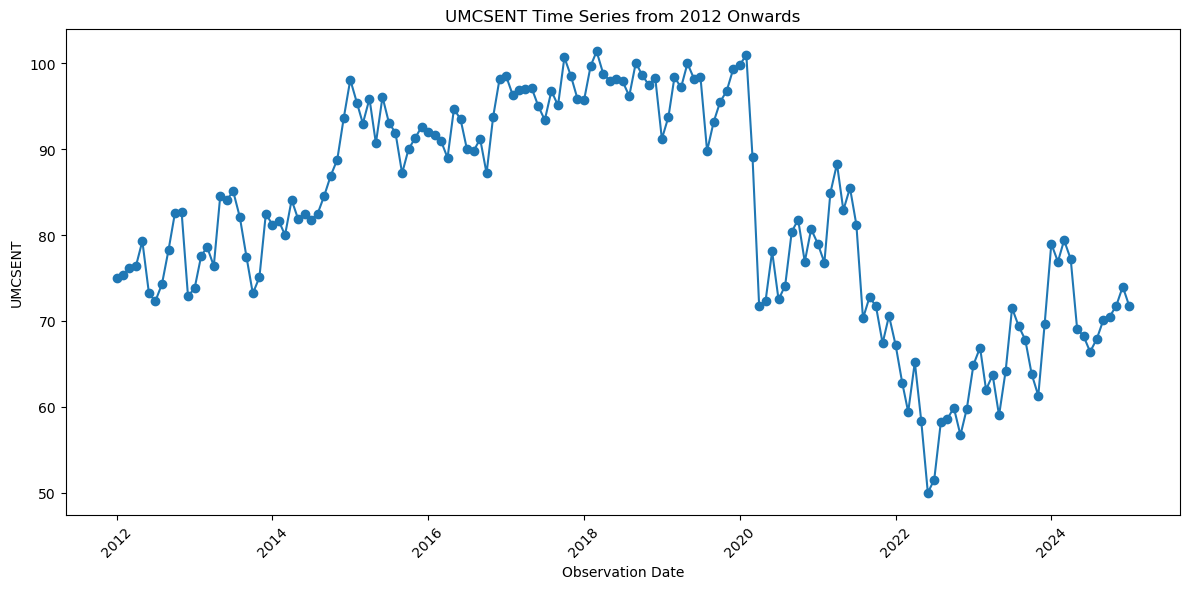

In [17]:
# Convert observation_date to datetime
Consumer['observation_date'] = pd.to_datetime(Consumer['observation_date'])

# Filter the DataFrame to only include rows from 2012 onwards
Consumer_2012 = Consumer[Consumer['observation_date'] >= '2012-01-01'].copy()

# Optionally, drop rows where UMCSENT is NaN
Consumer_2012 = Consumer_2012.dropna(subset=['UMCSENT'])

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(Consumer_2012['observation_date'], Consumer_2012['UMCSENT'], marker='o', linestyle='-')
plt.xlabel('Observation Date')
plt.ylabel('UMCSENT')
plt.title('UMCSENT Time Series from 2012 Onwards')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:
VIX = pd.read_csv('/Users/jameskrice/Desktop/VIX_History.csv')

In [19]:
print(VIX.head())

         DATE   OPEN   HIGH    LOW  CLOSE
0  01/02/1990  17.24  17.24  17.24  17.24
1  01/03/1990  18.19  18.19  18.19  18.19
2  01/04/1990  19.22  19.22  19.22  19.22
3  01/05/1990  20.11  20.11  20.11  20.11
4  01/08/1990  20.26  20.26  20.26  20.26


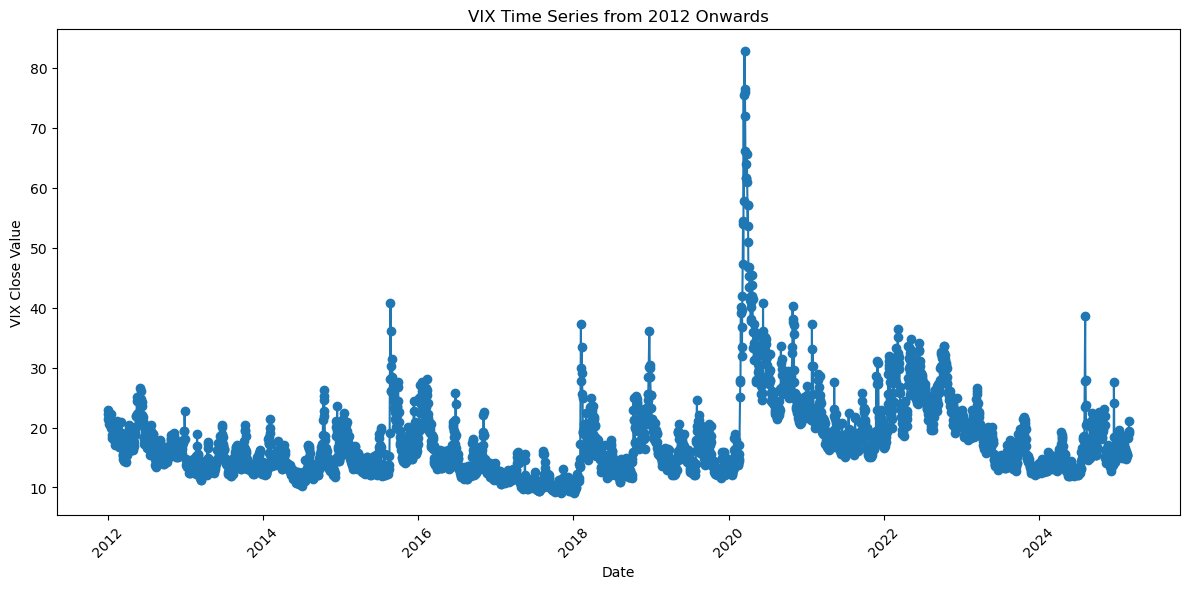

In [20]:
# Convert the DATE column to datetime (assuming the format is MM/DD/YYYY)
VIX['DATE'] = pd.to_datetime(VIX['DATE'], format='%m/%d/%Y')

# Filter the DataFrame to only include data from 2012 onwards
vix_2012 = VIX[VIX['DATE'] >= '2012-01-01'].copy()

# Optionally, drop rows where the CLOSE value is NaN
vix_2012 = vix_2012.dropna(subset=['CLOSE'])

# Plot the time series of the VIX CLOSE values
plt.figure(figsize=(12, 6))
plt.plot(vix_2012['DATE'], vix_2012['CLOSE'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('VIX Close Value')
plt.title('VIX Time Series from 2012 Onwards')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


In [37]:

# --- Step 1. Prepare Each Dataset as a Monthly Time Series ---

# (a) VIX data: convert DATE to datetime and resample to monthly average of CLOSE
vix = pd.read_csv('/Users/jameskrice/Desktop/VIX_History.csv')
vix['DATE'] = pd.to_datetime(vix['DATE'], format='%m/%d/%Y')
vix_2012 = vix[vix['DATE'] >= '2012-01-01'].copy()
vix_monthly = vix_2012.set_index('DATE').resample('M')['CLOSE'].mean().reset_index()
vix_monthly.rename(columns={'CLOSE': 'VIX_CLOSE'}, inplace=True)
vix_monthly = vix_monthly[['DATE', 'VIX_CLOSE']]

/var/folders/5q/1f09s04n43vcty_yjrp9hjjh0000gn/T/ipykernel_31451/45345860.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  vix_monthly = vix_2012.set_index('DATE').resample('M')['CLOSE'].mean().reset_index()


In [38]:

# (b) Consumer sentiment: load and filter from 2012 onward (assuming observation_date is monthly)
Consumer = pd.read_csv('/Users/jameskrice/Desktop/UMCSENT.csv')
Consumer['observation_date'] = pd.to_datetime(Consumer['observation_date'])
consumer_2012 = Consumer[Consumer['observation_date'] >= '2012-01-01'].copy()
consumer_monthly = consumer_2012.rename(columns={'observation_date': 'DATE', 'UMCSENT': 'UMCSENT'})
consumer_monthly = consumer_monthly[['DATE', 'UMCSENT']]

In [39]:

# (c) Tweets retweet counts: assume tweets_retweets is a DataFrame with a datetime index and sentiment columns.
# Here we sum across sentiments to get a daily total, then resample to monthly.
tweets_retweets['total_retweets'] = tweets_retweets.sum(axis=1)
tweets_monthly = tweets_retweets.resample('M').sum()[['total_retweets']].reset_index()
tweets_monthly.rename(columns={'total_retweets': 'TWEETS_RETWEETS'}, inplace=True)
tweets_monthly['DATE'] = tweets_monthly['local_time']
tweets_monthly = tweets_monthly[['DATE', 'TWEETS_RETWEETS']]

/var/folders/5q/1f09s04n43vcty_yjrp9hjjh0000gn/T/ipykernel_31451/2992776874.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tweets_monthly = tweets_retweets.resample('M').sum()[['total_retweets']].reset_index()


In [40]:

# (d) Misinformation retweet counts: same idea.
misinfo_retweets['total_retweets'] = misinfo_retweets.sum(axis=1)
misinfo_monthly = misinfo_retweets.resample('M').sum()[['total_retweets']].reset_index()
misinfo_monthly.rename(columns={'total_retweets': 'MISINFO_RETWEETS'}, inplace=True)
misinfo_monthly['DATE'] = misinfo_monthly['local_time']
misinfo_monthly = misinfo_monthly[['DATE', 'MISINFO_RETWEETS']]

/var/folders/5q/1f09s04n43vcty_yjrp9hjjh0000gn/T/ipykernel_31451/896154774.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  misinfo_monthly = misinfo_retweets.resample('M').sum()[['total_retweets']].reset_index()


In [41]:

# (e) Tweets counts: assume tweets_grouped is a DataFrame with a datetime index and sentiment columns.
tweets_grouped['total_tweets'] = tweets_grouped.sum(axis=1)
tweets_grouped_monthly = tweets_grouped.resample('M').sum()[['total_tweets']].reset_index()
tweets_grouped_monthly.rename(columns={'total_tweets': 'TWEETS_COUNT'}, inplace=True)
tweets_grouped_monthly['DATE'] = tweets_grouped_monthly['local_time']
tweets_grouped_monthly = tweets_grouped_monthly[['DATE', 'TWEETS_COUNT']]

/var/folders/5q/1f09s04n43vcty_yjrp9hjjh0000gn/T/ipykernel_31451/4086583384.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tweets_grouped_monthly = tweets_grouped.resample('M').sum()[['total_tweets']].reset_index()


In [42]:

# (f) Misinformation tweet counts:
misinfo_grouped['total_tweets'] = misinfo_grouped.sum(axis=1)
misinfo_grouped_monthly = misinfo_grouped.resample('M').sum()[['total_tweets']].reset_index()
misinfo_grouped_monthly.rename(columns={'total_tweets': 'MISINFO_COUNT'}, inplace=True)
misinfo_grouped_monthly['DATE'] = misinfo_grouped_monthly['local_time']
misinfo_grouped_monthly = misinfo_grouped_monthly[['DATE', 'MISINFO_COUNT']]

/var/folders/5q/1f09s04n43vcty_yjrp9hjjh0000gn/T/ipykernel_31451/802323112.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  misinfo_grouped_monthly = misinfo_grouped.resample('M').sum()[['total_tweets']].reset_index()


In [43]:
# Shift each date to the last day of its month
consumer_monthly['DATE'] = consumer_monthly['DATE'] + pd.offsets.MonthEnd(0)

# Check the updated dates
print(consumer_monthly.head())


          DATE  UMCSENT
710 2012-01-31     75.0
711 2012-02-29     75.3
712 2012-03-31     76.2
713 2012-04-30     76.4
714 2012-05-31     79.3


In [44]:
print(vix_monthly.head())

        DATE  VIX_CLOSE
0 2012-01-31  20.228000
1 2012-02-29  18.420500
2 2012-03-31  16.167273
3 2012-04-30  17.823000
4 2012-05-31  21.001818


In [45]:

# --- Step 2. Merge All Monthly DataFrames on DATE ---

# Merge consumer sentiment with VIX data
df_merged = consumer_monthly.merge(vix_monthly, on='DATE', how='inner')

# Merge tweet engagement measures (if some dates are missing, use left join and later fill NAs)
df_merged = df_merged.merge(tweets_monthly, on='DATE', how='left')
df_merged = df_merged.merge(misinfo_monthly, on='DATE', how='left')
df_merged = df_merged.merge(tweets_grouped_monthly, on='DATE', how='left')
df_merged = df_merged.merge(misinfo_grouped_monthly, on='DATE', how='left')

# Create a 'year' column for fixed effects (from the DATE)
df_merged['year'] = df_merged['DATE'].dt.year

# Fill missing values with 0 (or consider an appropriate imputation)
df_merged.fillna(0, inplace=True)

# Optional: inspect the merged DataFrame
print(df_merged.head())

# --- Step 3. Run the Time Series Regression with Year Fixed Effects ---

# We use an OLS regression where UMCSENT is the dependent variable and the regressors include:
# VIX_CLOSE, TWEETS_RETWEETS, MISINFO_RETWEETS, TWEETS_COUNT, MISINFO_COUNT,
# and we include year fixed effects via dummy variables (C(year)).
formula = 'UMCSENT ~ VIX_CLOSE + TWEETS_RETWEETS + MISINFO_RETWEETS + TWEETS_COUNT + MISINFO_COUNT + C(year)'

model = smf.ols(formula=formula, data=df_merged).fit()
print(model.summary())


        DATE  UMCSENT  VIX_CLOSE  TWEETS_RETWEETS  MISINFO_RETWEETS  \
0 2012-01-31     75.0  20.228000        1618746.0          711058.0   
1 2012-02-29     75.3  18.420500        1726594.0          700028.0   
2 2012-03-31     76.2  16.167273        2372670.0          693348.0   
3 2012-04-30     76.4  17.823000        1952954.0          965786.0   
4 2012-05-31     79.3  21.001818        1724552.0          449986.0   

   TWEETS_COUNT  MISINFO_COUNT  year  
0         548.0          242.0  2012  
1         526.0          258.0  2012  
2         686.0          306.0  2012  
3         636.0          314.0  2012  
4         604.0          198.0  2012  
                            OLS Regression Results                            
Dep. Variable:                UMCSENT   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     56.35
Date:                We